# **Sentiment Analysis of Yelp Business Reviews**


## **Objectives**


After completing this lab you will be able to:


*   Understand the theory behind sentiment analysis, including feature extraction from text (bag-of-words), and tokenizing\
    text (count vectorizer and term frequency-inverse document frequency)
*   Explore the Yelp Business Reviews dataset to perform text cleaning and vectorization
*   Build Word Count and Word Cloud plots to extract some meaning from the sentiments
*   Create a model to classify positive and negative reviews with Multinomial Naive Bayes Classifier, which is frequently used in the Natural Language Processing, as well as test your predictions


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/classification-of-yelp-restaurant-reviews-using-sentiment-analysis/images/SentAnalysis.png" alt="cognitiveclass.ai logo"  />
</center>


## **Introduction**


**Sentiment analysis** is the process of computationally identifying and categorizing opinions expressed in a piece of text.  It uses Natural Language Processing (NLP), machine learning, and other data analysis techniques to identify and categorize these opinions.

Sentiment analysis is often used by businesses to gain insight into how their customers feel about their product or service. With that feedback, they can make decisions to improve their customers’ experience.

In this guided project we will use customer reviews from the yelp database. **Yelp** is a local business directory service and review site with social networking features. It allows users to give ratings and review businesses. The review is usually short text consisting of few lines with about hundred words. Often, a review describes various dimensions about a business and the experience of a user with respect to those dimensions.


### **How Does Sentiment Analysis Work?**


Sentiment analysis algorithms fall into one of the three categories: **rule-based**, where the systems automatically perform sentiment analysis based on the pre-set rules (eg. various NLP techniques like stemming, tokenization, parsing etc.); **automatic**, where the systems rely on machine learning to learn from data, and **hybrid** systems combine both techniques.  In this project we will use machine learning classifier to work with our data.
The basic principle of sentiment analysis is described in the diagram below.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/classification-of-yelp-restaurant-reviews-using-sentiment-analysis/images/Classifier_Algorithm-2.png)


In the **Training Phase**, the feature extractor transfers the text input into feature vectors. Then, the classifier algorithm learns to associate the training text to the corresponding output (eg. label) based on the training data. Pairs of feature vectors and labels are fed into the machine learning algorithm to generate a model.  In the **Prediction Phase**, the feature extractor is used to transform the new document into feature vectors.  These vectors are then fed into the model, which generates predicted labels, in other words, it performs classification.


#### **Feature Extraction from Text**


Machine learning algorithms operate on a numeric feature space, expecting input as a two-dimensional array, where rows are instances and columns are features. In order to perform machine learning on text, we need to transform our text into vector representations. This process is called **feature extraction**, or **vectorization**, and it is an essential first step in language analysis.

Some of the common sentiment encoding approaches are *Bag-of-Words (BOW)*, *Bag-of-Ngrams*, and *Word Embeddings* (also known as word vectors).  To vectorize a corpus (collection of written text) with a bag-of-words approach, we represent every document from the corpus, as a vector, whose length is equal to the vocabulary of the corpus. The computation can be further simplified by sorting token positions of the vector into alphabetical order, as shown in the diagram below. Alternatively, we can keep a dictionary that maps tokens to vector positions. Either way, we arrive at a vector mapping of the corpus that enables us to uniquely represent every document. This article, ["A Gentle Introduction to the Bag-of-Words Model” ](https://machinelearningmastery.com/gentle-introduction-bag-words-model/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsclassificationofyelprestaurantreviewsusingsentimentanalysis29854152-2022-01-01) contains more information about the *Bag-of-Words* approach.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/classification-of-yelp-restaurant-reviews-using-sentiment-analysis/images/CountVectorizer.png)


#### **Tokenizing text with scikit-learn**


To perform feature extraction and vectorization, we first need to tokezine the text.  **Tokenization** is the process of converting text into tokens before transforming it into vectors.  There are many ways to tokenize text, some of them are included in various python libraries. In this guided project, we will use `*CountVectorizer()*` and `TfidfTransformer()` from `scikit-learn` library to tokenize/ vectorize our text.

`CountVectorizer()` can be imported from the `sklearn.feature_extraction model`.  It has its own internal pre-processing, tokenization and normalization methods. It is used to transform a given text into a vector on the basis of the frequency count of each word that occurs in the entire text. So, the value of each cell is nothing but the count of the word in that particular text sample. This link, from [Scikit-Learn Documentation](https://scikitlearn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsclassificationofyelprestaurantreviewsusingsentimentanalysis29854152-2022-01-01), contains more information on `CountVectorizer()`.

`CountVectorizer()` transformer does not take into the account the context of the corpus. Another approach, to consider the relative frequency of tokens in the document against their frequency in the other documents, would be to use the *Term Frequency–Inverse Document Frequency transformer (TF-IDF)*. It can also be imported from the the `sklearn.feature_extraction model`.

`TfidfTransformer()` normalizes the frequency of tokens in a document with respect to the rest of the corpus. This approach accentuates the tokens that are very relevant to a specific document, as shown in the diagram below, since they only appear in that document. `TfidfTransformer()` can be a better choice if more meaning needs to be derived from a particular sentiment. Visit [Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsclassificationofyelprestaurantreviewsusingsentimentanalysis29854152-2022-01-01#sklearn.feature_extraction.text.TfidfTransformer) to learn more about `TfidfTransformer()`.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/classification-of-yelp-restaurant-reviews-using-sentiment-analysis/images/TF-IDF_Vectorizer-2.png)


***


Bengfort, B., Bilbro, R., Ojeda, T. Applied Text Analysis with Python. O'Reilly Media, Inc. June 2018


***


## **Let's get started**


## **Install and Import the required libraries**


For this lab, we are going to be using several Python libraries such as scit-learn, ntlk, wordcloud - for sentiment analysis, matplotlib and seaborn for visualizations. Some of these libraries might be installed in your lab environment, others may need to be installed by you by removing the hash signs. The cells below will install these libraries when executed.


In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install nltk
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=8a0331b727cf9d1ed50e266f5112d469c75d6642c5329e9ca35bb10dabe6a286
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Import the required dataset**


Download data by removing the hash sign and running the cell below.


In [3]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/classification-of-yelp-restaurant-reviews-using-sentiment-analysis/asset/sample_data.json

--2022-08-19 17:00:11--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/classification-of-yelp-restaurant-reviews-using-sentiment-analysis/asset/sample_data.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70142708 (67M) [application/json]
Saving to: ‘sample_data.json’

sample_data.json    100%[===================>]  66.89M  34.1MB/s    in 2.0s    

2022-08-19 17:00:14 (34.1 MB/s) - ‘sample_data.json’ saved [70142708/70142708]



The data is downloaded from yelp.com, open to the public data source. It contains the reviews from different businesses listed on yelp.

Alternatively, it can also be downloaded from the link below:
[https://www.yelp.com/dataset/download](https://www.yelp.com/dataset/download?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsclassificationofyelprestaurantreviewsusingsentimentanalysis29854152-2022-01-01)

This Documentation contains more information about the dataset:
[https://www.yelp.com/dataset/documentation/main](https://www.yelp.com/dataset/documentation/main?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsclassificationofyelprestaurantreviewsusingsentimentanalysis29854152-2022-01-01)


## **Reading our data**


Let's read the data and look at the first 5 rows using the `head()` method.


In [4]:
rev = pd.read_json('sample_data.json')
rev.head()


,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
0,4686059,aFz1itIWIl7Qojxhpa0VoQ,SsUKdScC6NKcnFFio75wMA,H1ifIm6P1TgCjxM-TOlgTw,1,1,1,0,Ok so now i go to see a movie and homeboy hand...,2016-11-19 20:40:09,2016
1,6762380,s_ba4NB2G2QWS3izLkvl5Q,q5zFh3bhuLy6u7CzYlsa8Q,3r3RHfuLPgRSiRkp5udXSw,5,0,0,0,"It wasn't my choice to eat breakfast here, but...",2019-09-02 17:40:35,2019
2,491263,K1I5yuJICQpInOy-wCCo9A,UqqqBhqlAHiHfB_V3BNmvw,ljGzs5MhfnH1pKfJjFFRlQ,5,0,0,0,The staff is very friendly and I really like D...,2017-06-25 01:27:59,2017
3,6662859,NOwHErM1-u4d8Z6vSS7FwA,cmHaLdW8ssAXK2MKZ2idmw,xoJSkBTusOEt8PPvuw2qEQ,1,0,2,0,I usually have a great experience here but lef...,2017-02-05 20:22:26,2017
4,7361472,JjvOoHUs-OrPEnuUUanDsw,dTSwfFTTHPHwSe48qDkPXg,wTBid_bYRigHAl6vNHYeOQ,5,4,1,1,UPDATE:\nI have been contacted shortly after t...,2016-03-03 17:59:40,2016


Let's look at the dataset size, features, and types by using the `shape` and `info()` functions.


In [5]:
rev.shape
print(rev.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86354 entries, 0 to 86353
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        86354 non-null  int64         
 1   review_id    86354 non-null  object        
 2   user_id      86354 non-null  object        
 3   business_id  86354 non-null  object        
 4   stars        86354 non-null  int64         
 5   useful       86354 non-null  int64         
 6   funny        86354 non-null  int64         
 7   cool         86354 non-null  int64         
 8   text         86354 non-null  object        
 9   date         86354 non-null  datetime64[ns]
 10  year         86354 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 7.9+ MB
None


The original data was subsampled and this resulted in the dataset containing only 1% of the entire data, randomly sampled, for faster computation times.

The subset consists of 86,354 reviews. It also contains the *user_id* who wrote the review and the *business_id* the review is written for. It has 1 to 5 star rating, as well as *'useful', 'funny'*, and *'cool'* attributes about the reviews.


## **Data Wrangling and Exploratory Analysis**


In the following cells, we will remove some of the columns that will not be used in our analysis, add a length of the text column, and display our final data.


In [6]:
reviews = rev.drop(['index','date','year','business_id','review_id','user_id'], axis =1)

In [7]:
reviews['text length'] = rev['text'].apply(len)

In [8]:
reviews.head()

,stars,useful,funny,cool,text,text length
0,1,1,1,0,Ok so now i go to see a movie and homeboy hand...,337
1,5,0,0,0,"It wasn't my choice to eat breakfast here, but...",308
2,5,0,0,0,The staff is very friendly and I really like D...,449
3,1,0,2,0,I usually have a great experience here but lef...,403
4,5,4,1,1,UPDATE:\nI have been contacted shortly after t...,1551


Next, we will check if our data contains any null values. Having null values can interfere with the analysis, and in some cases, should be deleted or replaced.


In [9]:
reviews.isnull().any().any()

False

From the above output, we do not have any null values in our data.


Next, we will generate a count plot to display the distribution of stars in our dataset.


Text(0, 0.5, 'count')

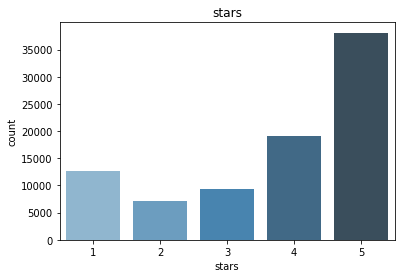

In [10]:
cplot = sns.countplot(x='stars', data=reviews, palette="Blues_d")
cplot.set_title('stars')
cplot.set_ylabel('count')

As we can see, our data is left-skewed, containing greater number of '5' star reviews.


Here, we will plot the distribution of the length of a review.


Text(0.5, 1.0, 'Text Length Distribution')

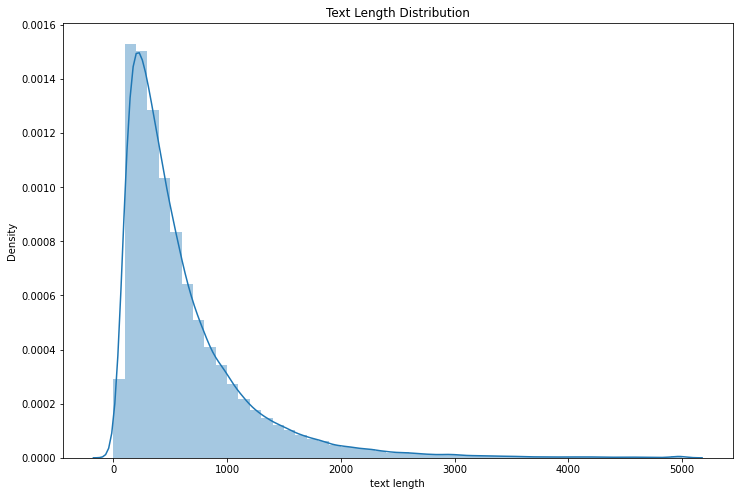

In [11]:
fig = plt.figure(figsize=(12,8))
sns.distplot(reviews['text length'], kde=True, bins=50)
plt.title('Text Length Distribution')

The average number of tokens in our reviews is 600. The longest review appears to be 5000 tokens. Tokens include words, stopwords (words used in high repetitions, like prepositions and pronouns), punctuation, and any other symbols or numbers.


## **Data Cleaning**


Next, we want to select only 'stars' and 'text' columns for our analysis.  These two columns provide all the necessary information for the purpose of our analysis.


In [12]:
text = reviews[['stars','text']]
text.head()

,stars,text
0,1,Ok so now i go to see a movie and homeboy hand...
1,5,"It wasn't my choice to eat breakfast here, but..."
2,5,The staff is very friendly and I really like D...
3,1,I usually have a great experience here but lef...
4,5,UPDATE:\nI have been contacted shortly after t...


In the cells below, we are performing some text cleaning. We will do so by defining a function that can remove stopwords and punctuation, convert to lower case, and keep only English reviews. After, we will make a copy of our 'cleaned' data to apply our function to.


In [13]:
cachedStopWords = stopwords.words("english")

def remove_punc_stopword(text):

    remove_punc = [word for word in text.lower() if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word for word in remove_punc.split() if word not in cachedStopWords]

In [14]:
cleaned_text = text.copy()
cleaned_text['text'] = text['text'].apply(remove_punc_stopword)

In [15]:
cleaned_text.head()

,stars,text
0,1,"[ok, go, see, movie, homeboy, hands, sheet, wa..."
1,5,"[wasnt, choice, eat, breakfast, boss, paying, ..."
2,5,"[staff, friendly, really, like, dr, hap, denta..."
3,1,"[usually, great, experience, left, extremely, ..."
4,5,"[update, contacted, shortly, review, email, tc..."


Now, to generate some insight from the reviews, we will generate the *frequency count* and *word cloud* plots.


First, we will associate a 5-star reviews with a positive sentiment and 1-star reviews with a negative sentiment.

3-star reviews would be neutral, but for simplicity purposes, we will only attempt to predict the positive and negative sentiment. This is because our goal is to train a model to recognize positive or negative language, and 3-star reviews are likely to contain both.

In normal language, neutral sentiment would mean that we are not using any words with an associated emotion, whereas this is not the case for reviews. Rather, customers assigning 3-star ratings are likely to have enjoyed some aspects and not enjoyed the others. For this reason, including a 'neutral' category is likely to affect our model accuracy and will not be used in this project.


## **The Most Frequently Occuring Words in Negative Reviews**


The cells below, define a function and make a plot with 20 most frequently used words in the **negative** reviews.


In [16]:
def plot_Freq(data):
    FreqDist(np.concatenate(data.text.reset_index(drop=True))).plot(20, cumulative=False)

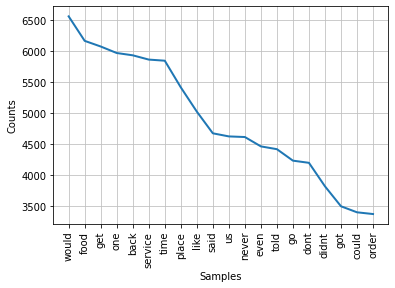

In [17]:
plot_Freq(cleaned_text[cleaned_text['stars']==1])

The cells below, define a function and make a `WordCloud()` plot with most frequently used words in the **negative** reviews.


In [18]:
def reviewCloud(star):
    startext = ' '.join(text[text['stars']==star]['text'])
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black',
        stopwords = STOPWORDS).generate(str(startext))

    fig = plt.figure(
        figsize = (10, 7),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)

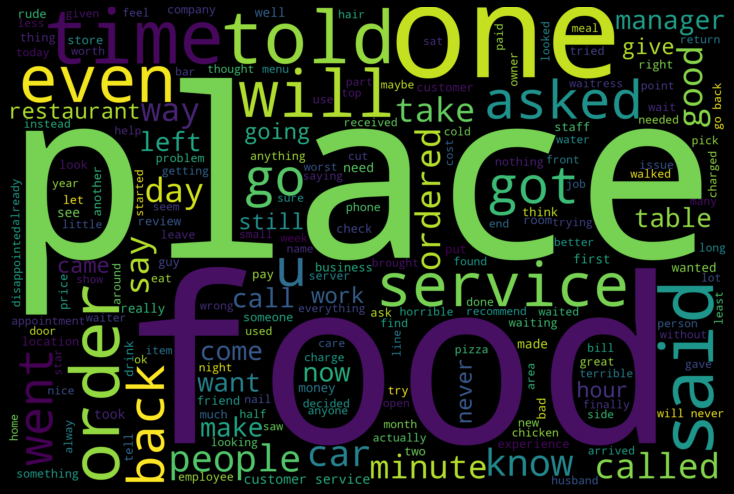

In [19]:
reviewCloud(1)

The *frequency count* and *word cloud* plots enable businesses to get to know their customers better. In our example,
the words such as 'place', 'food', and 'service' can provide some hints to why the reviewers gave such a low score to the business and what should be improved. From a business owner stand point, they will know that there is something about their 'food' and 'service' that the customers are not liking. In the next section, we will randomly select a business and see what insight a sentiment analysis can provide about this business.


## **A Random Business Sample Analysis**


To select a random business from our original reviews dataset, let's use the `tail()` function to view the last rows of our data.


In [20]:
rev.tail()

,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
86349,4601120,D467aq_VXL0SKJqp6SWPTw,RUdrwQexpRQZmICnvX2L5A,as2xQt48ltKKDUQbMCBrMw,4,0,0,0,When you want something healthy and feel like ...,2012-02-17 18:02:35,2012
86350,4320363,KtMR2Eg9wa92doBKm-Kv7Q,AocQ1CuE9-4CnjTtLvr2xg,-GMkoMATTeESkf6bhcNQ3g,5,0,0,0,Awesome service. High class place. Great atmos...,2016-01-17 16:34:22,2016
86351,4712218,csCAeaE-Ao-r_ezw-s3mww,C-itCDFr4rVypaUeJVuAIw,h2mQoTn0y57n94GON_Ku8Q,5,2,0,0,We have loved living at the Place on Ponce. Fr...,2016-05-03 23:31:14,2016
86352,7740980,VTDEeIqVQyKNLaq2Yf0tig,CYtKqfxO78q8MN6HX2JnDg,pLHTsCQLD1LQfnP_4fkPKQ,4,24,1,4,Skyhouse Midtown opened in 2013 so its basical...,2014-05-08 16:27:38,2014
86353,5606878,CGSSvIINJxvSBmrGZn5C-Q,43EpcZApmhG7SdaFJSzidA,xFEyKgGkgOycAsJvVsUzVw,3,0,1,0,sushi isnt like great quality like the ones i ...,2011-04-18 20:52:21,2011


Let's use the index column to select a random business review. Here, we have selected the last index in a dataset, 86353.


In [21]:
rev.loc[86353,:]

index                                                    5606878
review_id                                 CGSSvIINJxvSBmrGZn5C-Q
user_id                                   43EpcZApmhG7SdaFJSzidA
business_id                               xFEyKgGkgOycAsJvVsUzVw
stars                                                          3
useful                                                         0
funny                                                          1
cool                                                           0
text           sushi isnt like great quality like the ones i ...
date                                         2011-04-18 20:52:21
year                                                        2011
Name: 86353, dtype: object

As we see, from a short review, this is some kind of a sushi restaurant.


Now, we want to select all the reviews associated with this place, by grouping them together by their *business_id*.


In [22]:
restaurant = rev[rev.business_id==rev.loc[86353,:].business_id]

In [23]:
restaurant.head()

,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
17048,5158327,vb-_W-2LaTJUW-Wx0Q0FZg,NAa6fbFwzEKTjASMHPmv_Q,xFEyKgGkgOycAsJvVsUzVw,5,1,1,0,Katsu Currry Chicken is probably the BEST THIN...,2011-10-27 16:22:04,2011
19899,5894590,-Rc5jxwvbGd3pA_78e6U4Q,3mpsIk-UqhedQDxx24UKOw,xFEyKgGkgOycAsJvVsUzVw,5,0,0,0,Great place to have dinner. I was just there ...,2011-09-29 01:46:39,2011
19936,5860246,DSQPhNPgNYJSS3eXaJhXEQ,gqJ5LOG-eg1O_06peeUkLQ,xFEyKgGkgOycAsJvVsUzVw,4,0,0,0,A pretty decent Japanese restaurant. Ordered t...,2015-01-03 14:20:48,2015
25475,5811050,WOkOH97WqY96leXOXJbY5w,JfSEZtYwQiwq_PL68b80PQ,xFEyKgGkgOycAsJvVsUzVw,5,0,0,1,Conveniently located adjacent to the Back Bay ...,2019-08-16 12:44:34,2019
34020,5185078,2nWe8WvFlxa5kt8sLx8itQ,mL6q_AbyQSsoVJIMFwYjfQ,xFEyKgGkgOycAsJvVsUzVw,4,0,0,0,Can't believe I havent been here before in the...,2010-10-07 22:01:40,2010


First, we need to specify some words, that we want to extract from our reviews. Then, we will use *Count Vectorizer* function to vectorize these words and make an array. And last, we will count them up and plot them to display what do reviewers say about this place.


Here are some random words that we want to look for in our analysis.


In [24]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 
                  'awful', 'wow', 'hate']

We vectorize and transform them into an array.


In [25]:
vectorizer = CountVectorizer(vocabulary=selected_words, lowercase=False)

selected_word_count = vectorizer.fit_transform(restaurant['text'].values.astype('U'))
vectorizer.get_feature_names()

['awesome',
 'great',
 'fantastic',
 'amazing',
 'love',
 'horrible',
 'bad',
 'terrible',
 'awful',
 'wow',
 'hate']

In [26]:
word_count_array = selected_word_count.toarray()
word_count_array.shape
#print(word_count_array)

(13, 11)

Our array is 11 columns by 13 rows matrix.


Next, we extract our features by using the `get_feature_names()` function, convert them to pandas data frame, and add them together using the `sum()` function.


In [27]:
rest = pd.DataFrame(index=vectorizer.get_feature_names(), \
                    data=word_count_array.sum(axis=0)).rename(columns={0: 'Count'})

Below, we are plotting the count of our words.


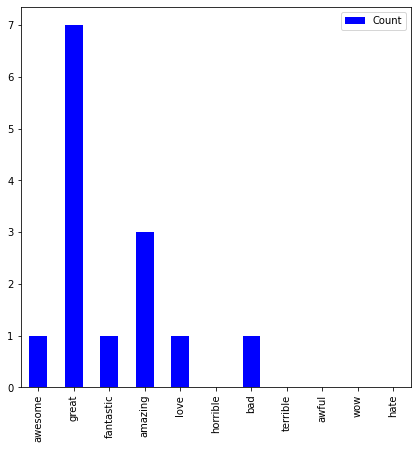

In [28]:
rest.plot(kind='bar', stacked=False, figsize=[7,7], colormap='winter')

From this plot, we see that this restaurant is most likely a good spot to visit. The word "great" is the most frequently used in the reviews.  The word "bad" is also used, but less frequently.


## **Practice**


**Try it yourself:** In this task, you will  practice to generate the *frequency count and word cloud plots* for all the **positive** reviews in the dataset.


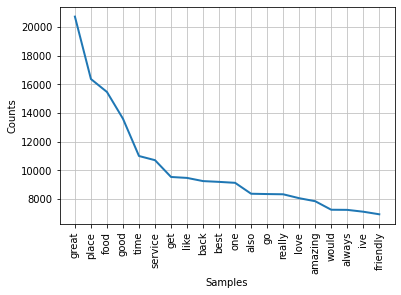

In [29]:
# Enter your code below and run the cell
plot_Freq(cleaned_text[cleaned_text['stars']==5])

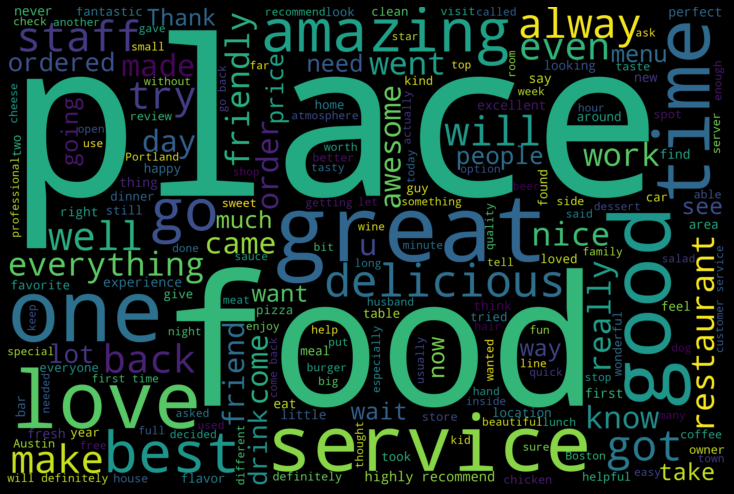

In [30]:
# Enter your code below and run the cell
reviewCloud(5)

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>plot_Freq(cleaned_text[cleaned_text['stars']==5])</code>
</details>


<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>reviewCloud(5)</code>
</details>


Question. What insights can you draw from these plots?


<details>
<summary><strong>Answer</strong> (Click Here)</summary>
    &emsp; &emsp; Positive reviews word cloud generates words such as *'place', 'food', 'amazing', 'great', 'love'*. So the positive sentiments have stronger emotions associated with them, signifying the areas where the business is performing very well.
</details>


**Try it yourself:** In this task, you will practice to extract information about what type of food is served in the discussed above restaurant. Alternatively, you can select any other type of business from the dataset and extract some information from it.


<details>
<summary><strong>Possible Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>foods = ['sushi', 'miso', 'teriyaki', 'tempura', 'udon', \
                  'soba', 'ramen', 'yakitori', 'izakaya']

vectorizer = CountVectorizer(vocabulary=foods, lowercase=False)
vietnamese_cuisine_count = vectorizer.fit_transform(restaurant\['text'].values.astype('U'))

foods_array = vietnamese_cuisine_count.toarray()

type_cuisine = pd.DataFrame(index=vectorizer.get_feature_names(), \
data=foods_array.sum(axis=0)).rename(columns={0: 'Count'})

type_cuisine.plot(kind='bar', stacked=False, figsize=\[7,7], colormap='winter')</code>

</details>


***


## **Modeling**


Next, we will build a model to classify our reviews into positive or negative.  For this, we will select only '1' and '5' stars reviews to train our model on. We will separate the dataset into x and y variables.


In [32]:
select_stars = text[(text['stars']==1) | (text['stars']==5)]

In [33]:
x = select_stars['text']
y = select_stars['stars']

### **Using *CountVectorizer* to transform the data**

As mentioned in the **Introduction** section, before building a model, we need to transform our text into a matrix of token counts. We will use `CountVectorizer()` to perform this task. We will also print the dimensions of our matrix, after vectorization. And last, we will split our data into 80% training and 20% testing sets.


In [34]:
count_vec = CountVectorizer().fit(x)
x = count_vec.transform(x)

In [35]:
print("Shape of the sparse matrix: ", x.shape)

Shape of the sparse matrix:  (50802, 57396)


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

### **Multinomial Naive Bayes Model**

In this classification problem, we will use the `MultinomialNB()` for our classification task. This classifier is suitable for classification with discrete features (in our case, word counts). It can also work with fractional counts, such as after *TD-IDF transform* vectorization. More information on *Multinomial Naive Bayes* classifier [here](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsclassificationofyelprestaurantreviewsusingsentimentanalysis29854152-2022-01-01).


In [37]:
mnb = MultinomialNB()

mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)

print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[2239  282]
 [ 480 7160]]
Score: 92.5
Classification Report:               precision    recall  f1-score   support

           1       0.82      0.89      0.85      2521
           5       0.96      0.94      0.95      7640

    accuracy                           0.93     10161
   macro avg       0.89      0.91      0.90     10161
weighted avg       0.93      0.93      0.93     10161



We are using *precision, recall*, and *F1* score for our model evaluation.  These are more appropriate performance metrics when dealing with the unbalanced data (our data is left-skewed, containing more '5' star reviews). As shown in this classification report, our model performs well on '1' and '5' star reviews, with 82% and 96% precision values respectively.


### **Using *Term Frequency–Inverse Document Frequency transformer(TF-IDF)* to transform the data**


Now, we will try an alternative way to tokenize our text, by using the `TfidfTransformer()` transformer.


In [38]:
tfidf_transformer = TfidfTransformer()
x_tfidf = tfidf_transformer.fit_transform(x)

x_tfidf_train, x_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(x_tfidf,y, test_size=0.2, random_state=42)

mnb_tfidf = MultinomialNB()

mnb_tfidf.fit(x_tfidf_train,y_tfidf_train)
pred_mnb_tfidf = mnb_tfidf.predict(x_tfidf_test)

print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_tfidf_test,pred_mnb_tfidf))
print("Score:",round(accuracy_score(y_tfidf_test,pred_mnb_tfidf)*100,2))
print("Classification Report:",classification_report(y_tfidf_test,pred_mnb_tfidf))

Confusion Matrix for Multinomial Naive Bayes:
[[1194 1327]
 [  19 7621]]
Score: 86.75
Classification Report:               precision    recall  f1-score   support

           1       0.98      0.47      0.64      2521
           5       0.85      1.00      0.92      7640

    accuracy                           0.87     10161
   macro avg       0.92      0.74      0.78     10161
weighted avg       0.88      0.87      0.85     10161



The precision score has improved significantly for the '1' star reviews, increasing to 98%. However, the precision for '5' star reviews has decreased to 85%.  *TF-IDF Vectorizer* does not make any significant improvement in our model performance. Although, it is more advanced way to vectorize the text data, in our case, it does not improve the overall precision, on the contrary, it lowers it.


## **Predicting**


Now, we can test our `MulninomialNB()` model to see whether it can predict '1' and '5' star ratings.


First, let's try a **positive** review.


In [40]:
positive_review = text['text'][1]
print(positive_review)
print("Actual Rating: ",text['stars'][1])
pr_t = count_vec.transform([positive_review])
print("Predicted Rating:")
mnb.predict(pr_t)[0]

It wasn't my choice to eat breakfast here, but the boss was paying!
Very simple breakfast options and everything was done to perfection. 10 people in our group and everyone was happy with their food! The service was so perfect with the right amount of sarcasm!
The server did admit to doing open mic stand up
Actual Rating:  5
Predicted Rating:


5

Now, let's try a **negative** review.


In [41]:
negative_review = text['text'][3]
print(negative_review)
print("Actual Rating: ",text['stars'][3])
nr_t = count_vec.transform([negative_review])
print("Predicted Rating:")
mnb.predict(nr_t)[0]

I usually have a great experience here but left extremely disappointed today. I pulled in to the drive thru at 11:55 and they stop serving breakfast sandwiches at noon. I got to the window at 11:58 and they wouldn't sell me a sandwich. Then I still ordered a chai latte which was only 3/4 full. Won't be giving my business to them again, very disappointing since I've had great experiences before today.
Actual Rating:  1
Predicted Rating:


1

As we can see, the `MulninomialNB()` model, in both cases, has accurately predicted the review rating score.


## **Conclusion**


Great work! In this project, while exploring the Yelp Reviews dataset, you have learned about text analysis techniques and how they can be used to extract some information from text.

You have also learned to apply the *Multinomial Naive Bayes* model to classify and predict positive and negative sentiments with more than 80% accuracy.
